#### Imports

In [1]:
import mne      # toolbox for analyzing and visualizing EEG data
import os       # using operating system dependent functionality (folders)
import pandas   # data analysis and manipulation
import numpy    # numerical computing (manipulating and performing operations on arrays of data)
import copy     # Can Copy and Deepcopy files so original file is untouched.
import glob

from IPython.display import clear_output
import warnings

#### Load EEG files
Change eeg_file_root to path where the Dataset is located. 

In [2]:
eeg_list = []
eeg_filenames = []
eeg_filelocation = []

eeg_file_root = "C:/Projects/new_data_karin_EEG/not_zip/"

pattern = os.path.join(eeg_file_root, '**/*.bdf')

files = glob.glob(pattern, recursive=True)

for file in files:
    if file.endswith('.bdf'):  # and len(file) == 8:
        BdfFile = mne.io.read_raw_bdf(file)
        eeg_list.append(BdfFile)
        eeg_filenames.append(file.replace(".bdf", ""))
        eeg_filelocation.append(file)
        clear_output(wait=True)
print(len(eeg_list), "EEG files loaded")

99 EEG files loaded


In [3]:
import numpy as np
from numpy.fft import fft, fftfreq
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib

from mne.time_frequency.tfr import morlet
from mne.viz import plot_filter, plot_ideal_filter

import mne

sfreq = 1000. # signal collection frequency?
f_p = 40. # this is the stop freuqency, above which we should 0
flim = (1., sfreq / 2.)  # limits for plotting

In [4]:
# make something to filter
dur = 10.
center = 2.
morlet_freq = f_p
tlim = [center - 0.2, center + 0.2]
tticks = [tlim[0], center, tlim[1]]
flim = [20, 70]

x = np.zeros(int(sfreq * dur) + 1)
blip = morlet(sfreq, [morlet_freq], n_cycles=7)[0].imag / 20.
n_onset = int(center * sfreq) - len(blip) // 2
x[n_onset:n_onset + len(blip)] += blip
x_orig = x.copy()

rng = np.random.RandomState(0)
x += rng.randn(len(x)) / 1000.
x += np.sin(2. * np.pi * 60. * np.arange(len(x)) / sfreq) / 2000.

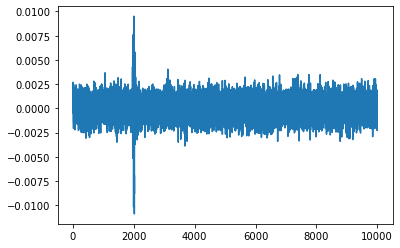

In [5]:
plt.plot(x)

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)
# use just 60 seconds of data and mag channels, to save memory
raw.crop(0, 60).pick_types(meg='mag', stim=True).load_data()

Opening raw data file C:\Users\makeda\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 36037  =      0.000 ...    60.000 secs...


<Raw | sample_audvis_raw.fif, 111 x 36038 (60.0 s), ~33.5 MB, data loaded>

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 19821 samples (33.001 sec)

Using matplotlib as 2D backend.
Opening raw-browser...


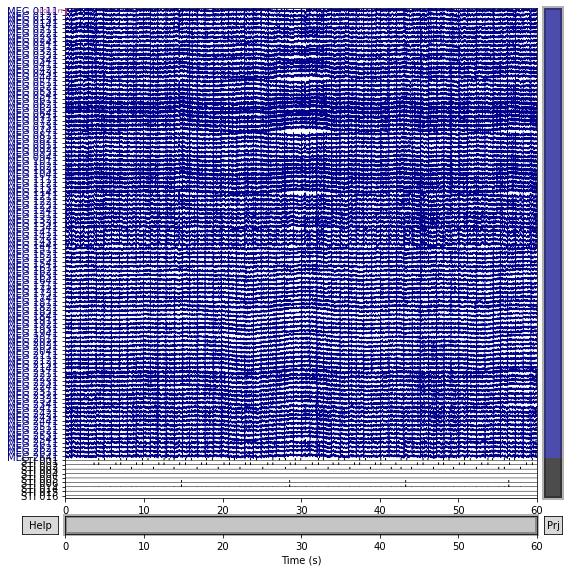

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 9911 samples (16.501 sec)

Opening raw-browser...


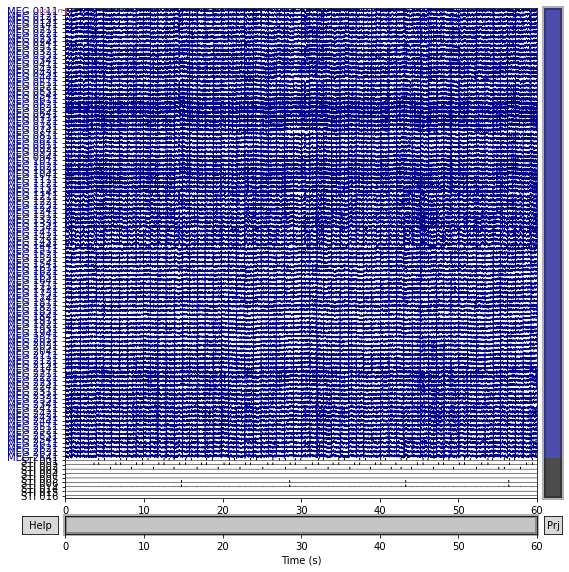

In [10]:
for cutoff in (0.1, 0.2):
    raw_highpass = raw.copy().filter(l_freq=cutoff, h_freq=None)
    with mne.viz._figure.use_browser_backend('matplotlib'):
        fig = raw_highpass.plot(duration=60, proj=False,
                                n_channels=len(raw.ch_names), remove_dc=False)
    fig.subplots_adjust(top=0.9)
    fig.suptitle('High-pass filtered at {} Hz'.format(cutoff), size='xx-large',
                 weight='bold')

In [8]:
#from mne.viz import use_browser_backend

Using matplotlib as 2D backend.


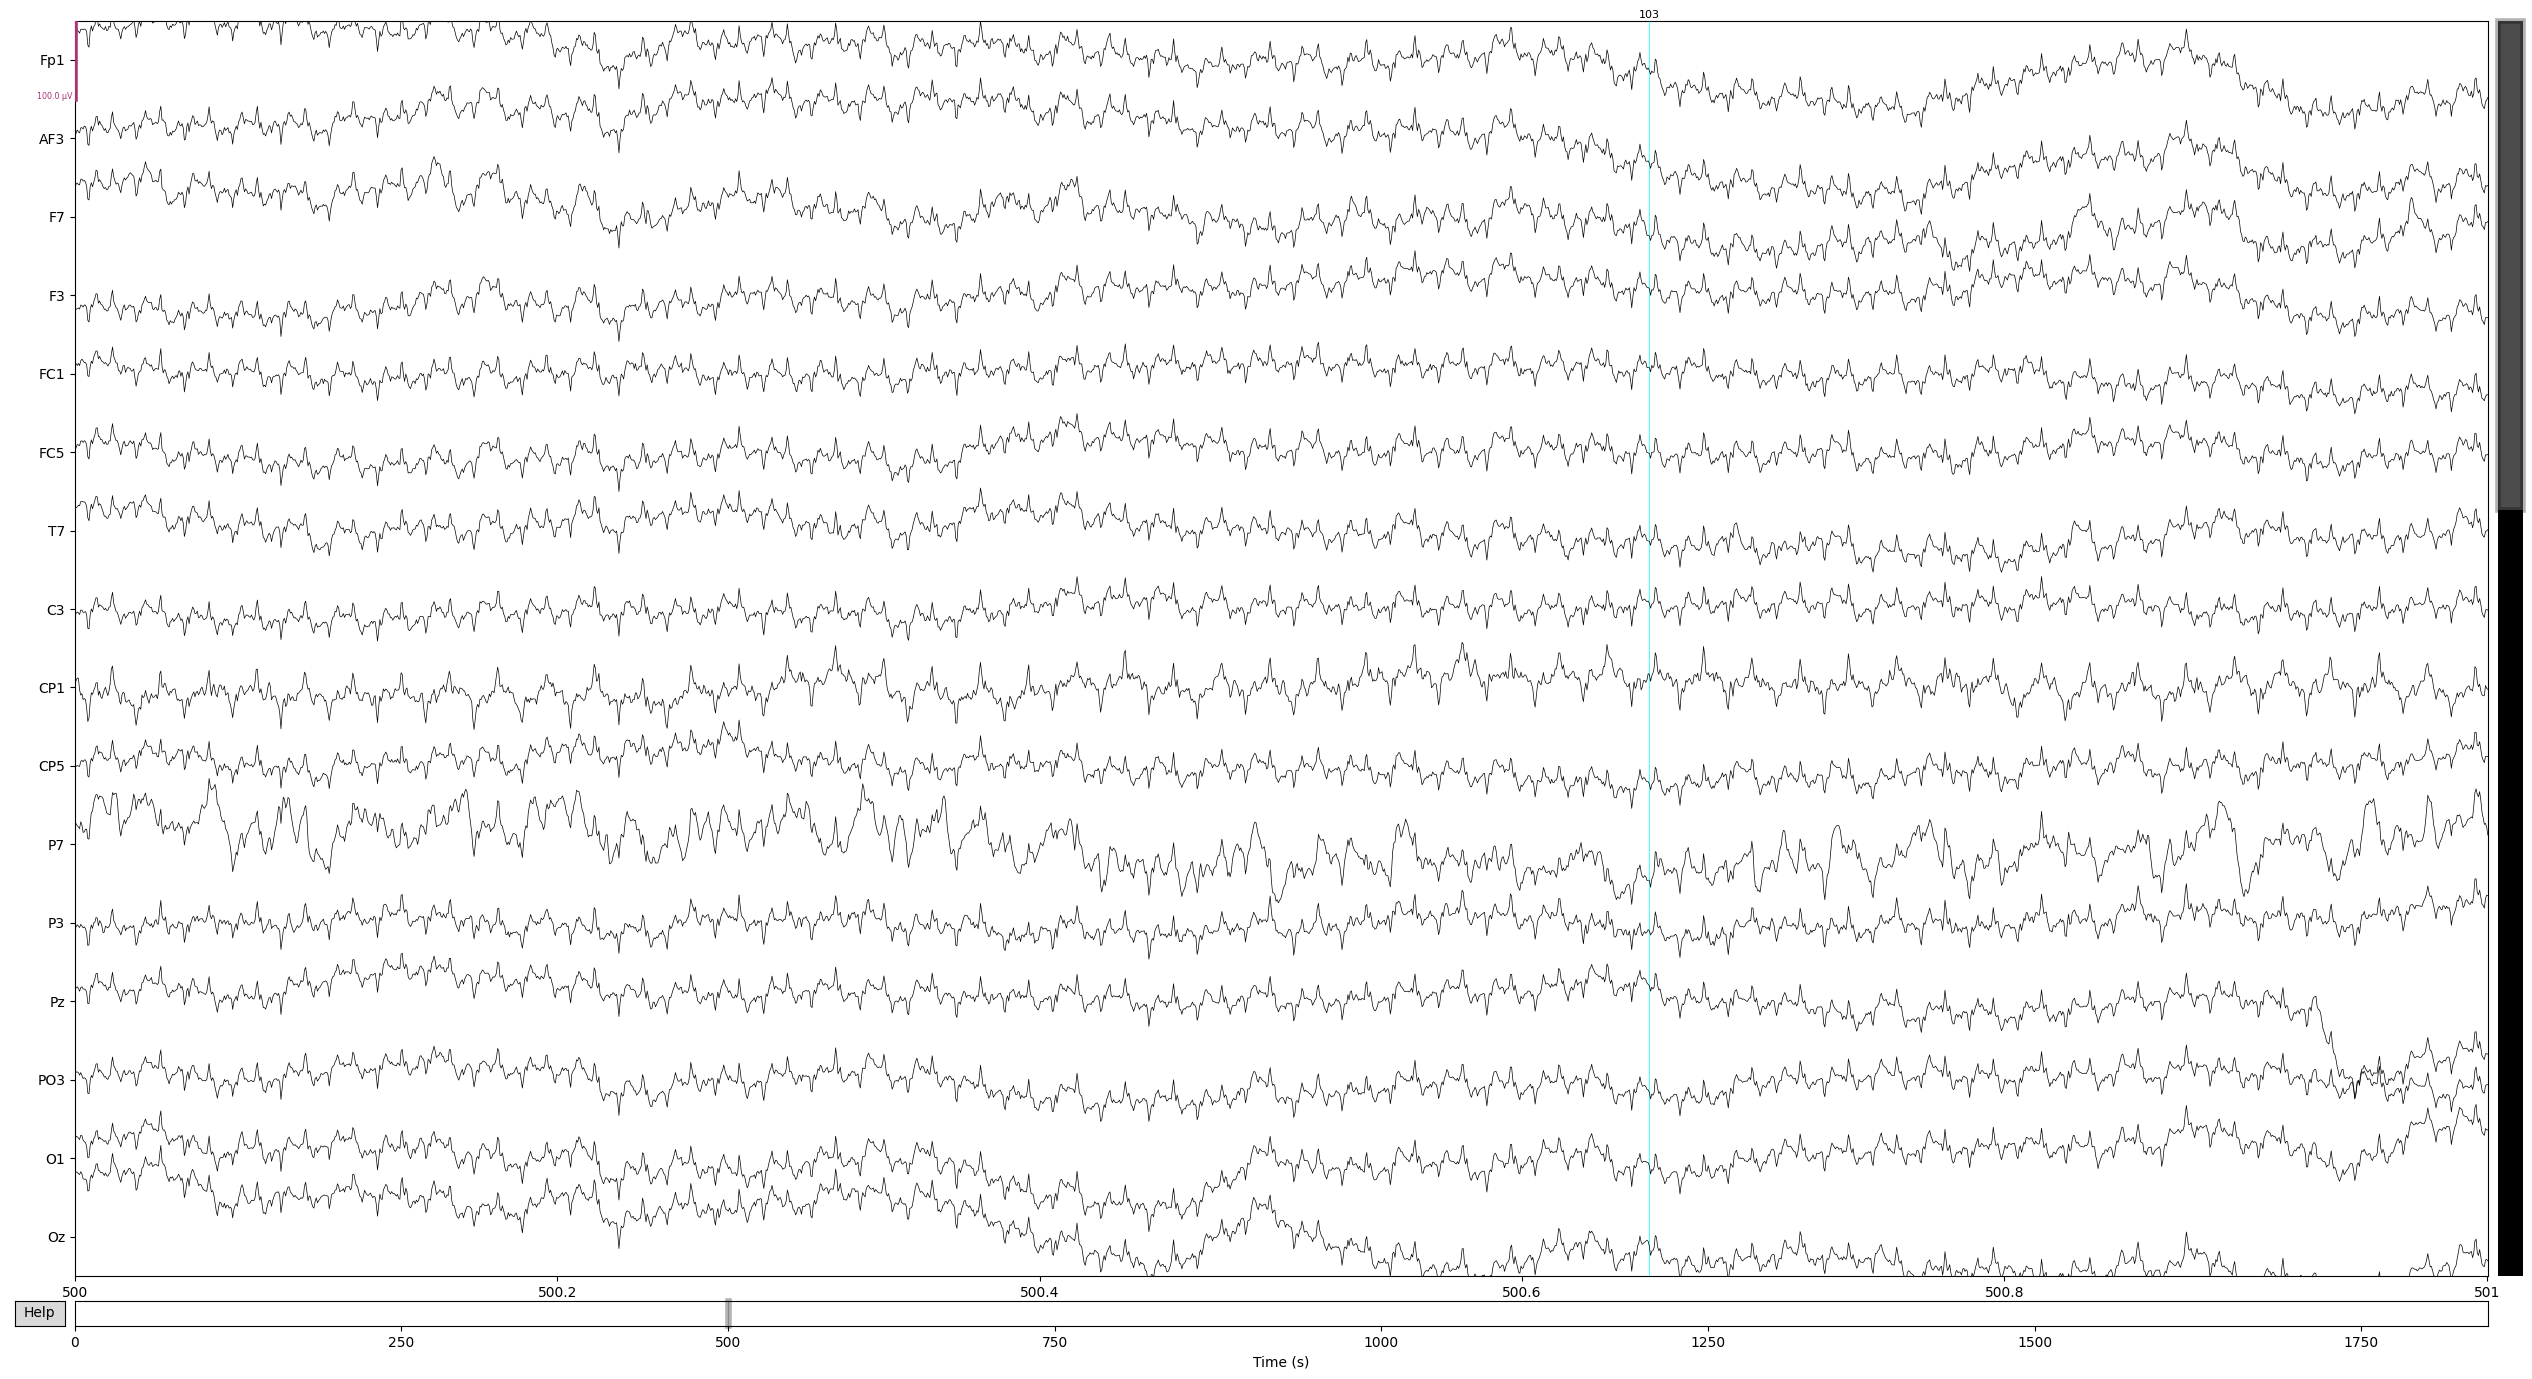

In [6]:
index = 3
%matplotlib qt 
mne.viz.plot_raw(EEG[index], events = Events[index],n_channels=16, scalings = 50e-6  ,duration = 1, start = 500)